## Topic : UNEMPLOYMENT IN INDIA

**Overview** : This dataset contains the unemployment rate of all the states in India. It explains how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.

**Content** :
Region = states in India
Date = date which the unemployment rate observed
Frequency = measuring frequency (Monthly)
Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India
Estimated Employed = percentage of people employed
Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force.

**Essentially The company wants to know**:

1. How Covid-19 affects the employment

**The steps are broadly**:

1. Read and understand the data.
2. Clean the data.
3. Data visualization and understanding.
4. Final Result - Visualizing Impact of COVID-19 on Employment.

## Step 1: Reading and understanding the data

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import io

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.shape

(768, 7)

In [7]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

## Step 2: Data Cleaning

In [9]:
df[' Date'].unique()

array([' 31-05-2019', ' 30-06-2019', ' 31-07-2019', ' 31-08-2019',
       ' 30-09-2019', ' 31-10-2019', ' 30-11-2019', ' 31-12-2019',
       ' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020', nan], dtype=object)

In [10]:
# Remove extra space in column headers using strip() function

df.rename(columns=lambda x: x.strip(), inplace=True)
print(df)

             Region         Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019   Monthly                             3.65   
1    Andhra Pradesh   30-06-2019   Monthly                             3.05   
2    Andhra Pradesh   31-07-2019   Monthly                             3.75   
3    Andhra Pradesh   31-08-2019   Monthly                             3.32   
4    Andhra Pradesh   30-09-2019   Monthly                             5.17   
..              ...          ...       ...                              ...   
763             NaN          NaN       NaN                              NaN   
764             NaN          NaN       NaN                              NaN   
765             NaN          NaN       NaN                              NaN   
766             NaN          NaN       NaN                              NaN   
767             NaN          NaN       NaN                              NaN   

     Estimated Employed  Estimated Labour Participa

In [11]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [12]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
# convert the date column into a date-time object
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# extract the year components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [15]:
df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.strftime('%b')

In [16]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019.0,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019.0,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019.0,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019.0,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019.0,Sep


In [17]:
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
Year                                              float64
Month                                              object
dtype: object

**Dealing with missing values**

In [18]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
Year                                       28
Month                                      28
dtype: int64

In [19]:
# Drop rows with any null values and create a new dataframe
unemp_df = df.dropna()

In [20]:
unemp_df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
Year                                       0
Month                                      0
dtype: int64

In [21]:
unemp_df.shape

(740, 9)

In [22]:
unemp_df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
Year                                              float64
Month                                              object
dtype: object

In [23]:
unemp_df["Year"].unique()

array([2019., 2020.])

In [24]:
unemp_df["Year"] = unemp_df["Year"].astype(int)

In [25]:
unemp_df["Year"] = unemp_df["Year"].astype(str)

In [26]:
unemp_df["Year"].unique()

array(['2019', '2020'], dtype=object)

In [27]:
# Dropping the 'Frequency' column as it only contains one value i.e., Monthly
unemp_df = unemp_df.drop('Frequency', axis=1)

In [28]:
unemp_df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,Sep


In [29]:
unemp_df.columns

Index(['Region', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year', 'Month'],
      dtype='object')

In [30]:
unemp_df.dtypes

Region                                             object
Date                                       datetime64[ns]
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
Year                                               object
Month                                              object
dtype: object

In [31]:
unemp_df.nunique().tolist()

[28, 14, 624, 740, 626, 2, 2, 12]

In [32]:
## checking count of unique values in each column
for i in unemp_df.columns:
    print(unemp_df[i].value_counts())

Region
Andhra Pradesh      28
Bihar               28
Chhattisgarh        28
Delhi               28
Karnataka           28
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jharkhand           28
Maharashtra         28
Madhya Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Odisha              28
Rajasthan           28
Punjab              28
Telangana           28
Tamil Nadu          28
Uttarakhand         27
Meghalaya           27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64
Date
2019-10-31    55
2019-11-30    55
2019-06-30    54
2019-07-31    54
2019-05-31    54
2019-08-31    53
2020-01-31    53
2019-12-31    53
2020-02-29    53
2019-09-30    52
2020-03-31    52
2020-04-30    51
2020-05-31    51
2020-06-30    50
Name: count, dtype: int64
Estimated Unemployment Rate (%)
0.00     11
3.31      

## Step 3: Data Visualization and understanding (EDA)

In [33]:
## Segregating columns in categorical and numerical columns:

cat_cols=[]    # categorical columns
num_cols=[]   # numeric columns
for i in unemp_df.columns:
	if unemp_df[i].nunique()>30:
		num_cols.append(i)
	else:
		cat_cols.append(i)

In [34]:
print(cat_cols)

['Region', 'Date', 'Area', 'Year', 'Month']


In [35]:
print(num_cols)

['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']


**Visualizing numerical columns using boxplots**

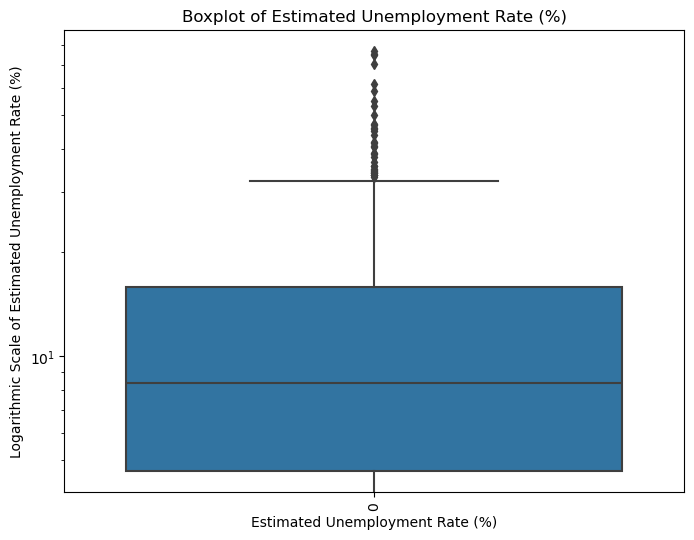

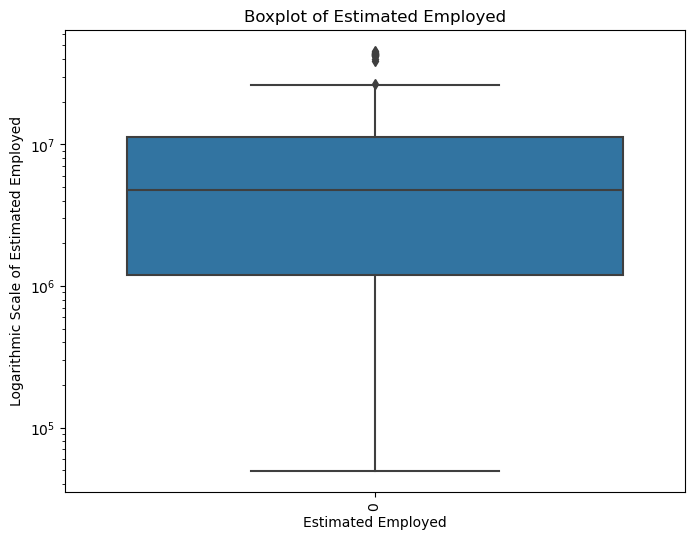

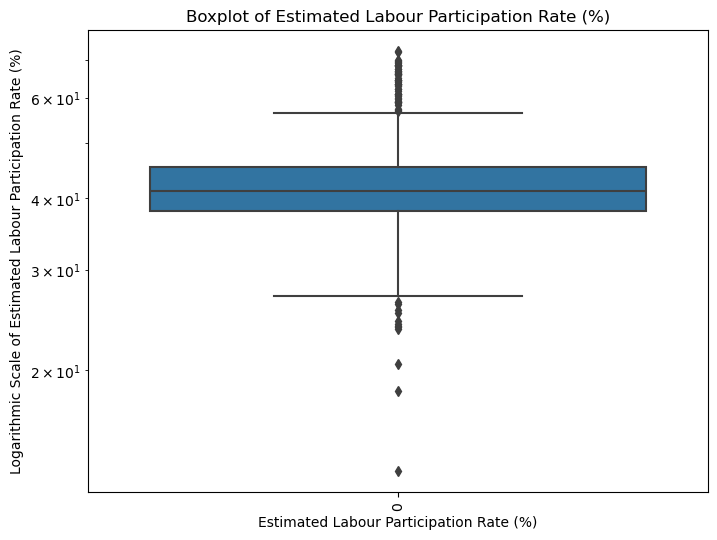

In [36]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(unemp_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Logarithmic Scale of {col}')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()

**Visualizing categorical columns using countplots**

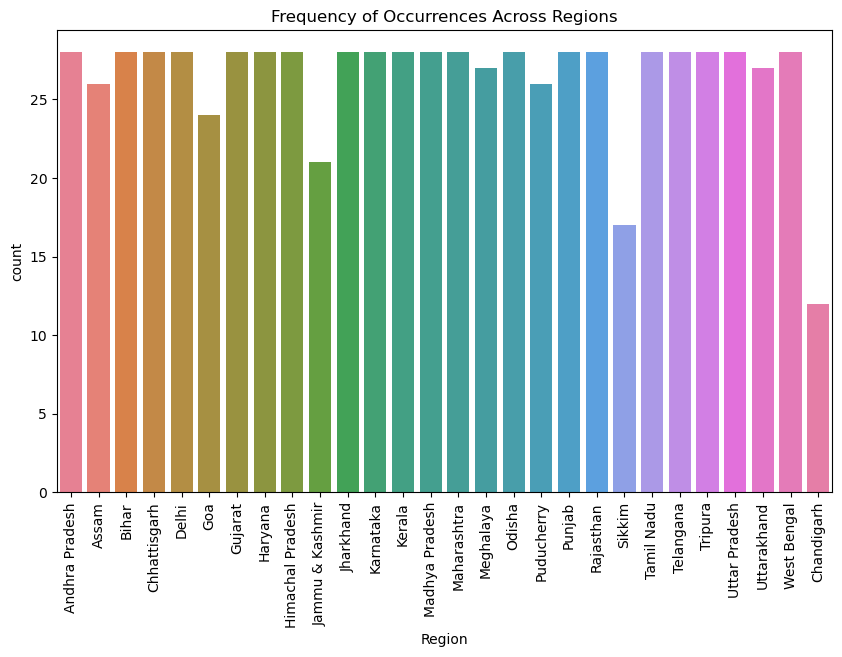

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=unemp_df, x= "Region", palette="husl")
plt.title('Frequency of Occurrences Across Regions')
plt.xticks(rotation=90)
plt.show()

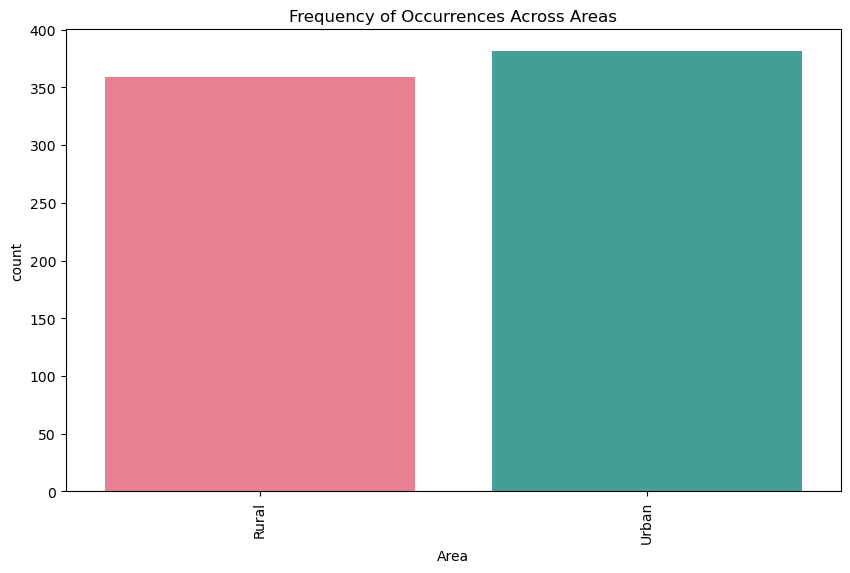

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=unemp_df, x= "Area", palette="husl")
plt.title('Frequency of Occurrences Across Areas')
plt.xticks(rotation=90)
plt.show()

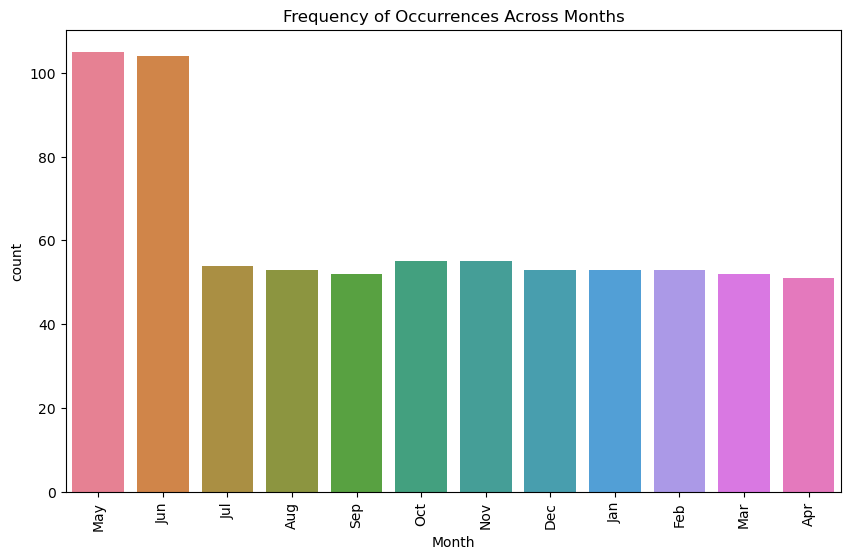

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=unemp_df, x= "Month", palette="husl")
plt.title('Frequency of Occurrences Across Months')
plt.xticks(rotation=90)
plt.show()

***visualizing numerical columns using pairplot***

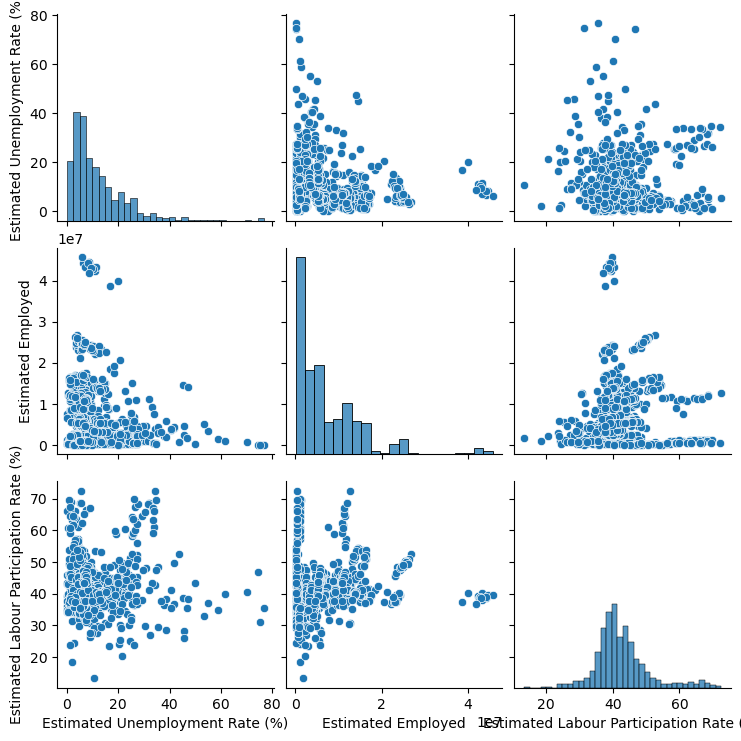

In [40]:
sns.pairplot(unemp_df)
plt.show()

**Univariate Analysis - categorical unordered data**

In [41]:
unemp_df.Region.value_counts(normalize=True)

Region
Andhra Pradesh      0.037838
Bihar               0.037838
Chhattisgarh        0.037838
Delhi               0.037838
Karnataka           0.037838
Gujarat             0.037838
Haryana             0.037838
Himachal Pradesh    0.037838
Jharkhand           0.037838
Maharashtra         0.037838
Madhya Pradesh      0.037838
Kerala              0.037838
West Bengal         0.037838
Uttar Pradesh       0.037838
Tripura             0.037838
Odisha              0.037838
Rajasthan           0.037838
Punjab              0.037838
Telangana           0.037838
Tamil Nadu          0.037838
Uttarakhand         0.036486
Meghalaya           0.036486
Assam               0.035135
Puducherry          0.035135
Goa                 0.032432
Jammu & Kashmir     0.028378
Sikkim              0.022973
Chandigarh          0.016216
Name: proportion, dtype: float64

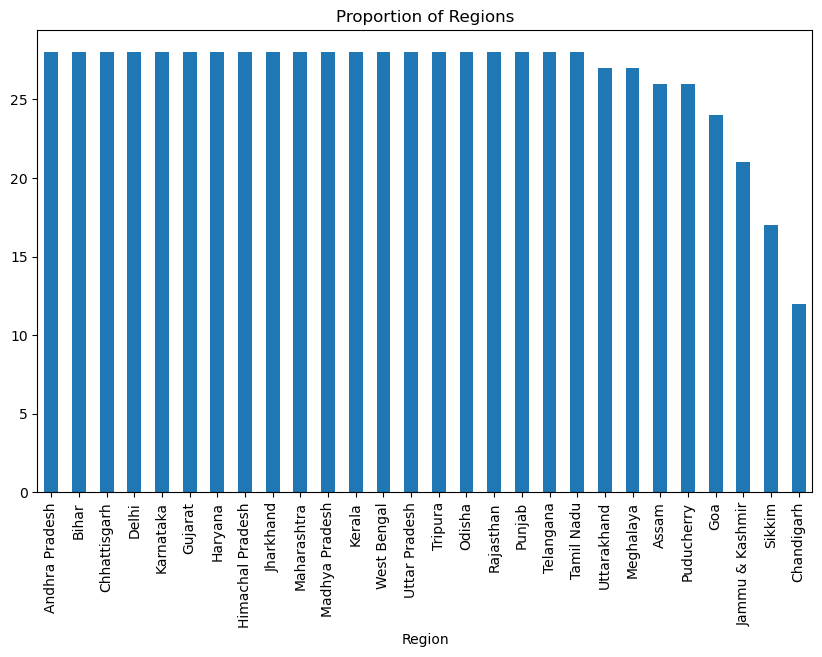

In [42]:
plt.figure(figsize=(10, 6))
unemp_df.Region.value_counts().plot.bar()
plt.title('Proportion of Regions')
plt.show()

**Univariate Analysis - categorial ordered data**

In [43]:
## Year variable
unemp_df.Month.value_counts()

Month
May    105
Jun    104
Nov     55
Oct     55
Jul     54
Aug     53
Dec     53
Jan     53
Feb     53
Sep     52
Mar     52
Apr     51
Name: count, dtype: int64

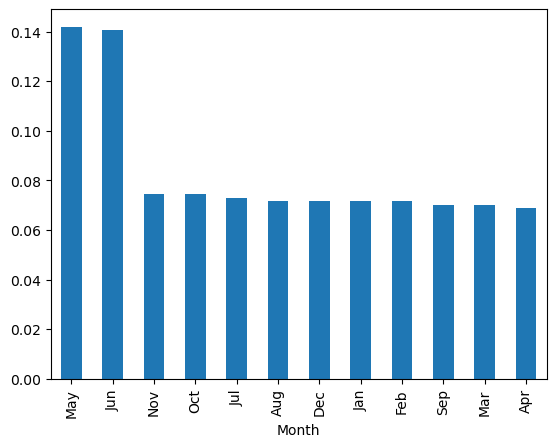

In [44]:
unemp_df.Month.value_counts(normalize=True).plot.bar()
plt.show()

***Bivariate Analysis***

In [45]:
unemp_df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,Sep


**Analysis between two numerical variables**

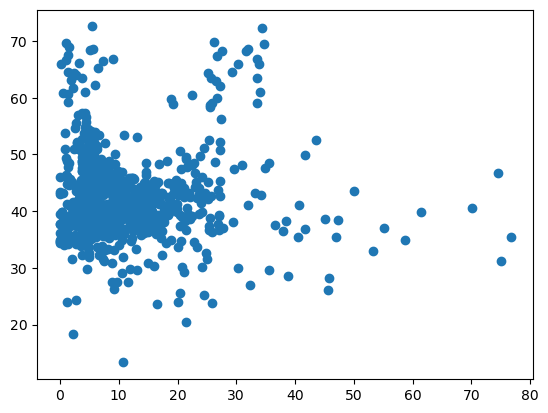

In [46]:
plt.scatter(unemp_df["Estimated Unemployment Rate (%)"], unemp_df["Estimated Labour Participation Rate (%)"])
plt.show()

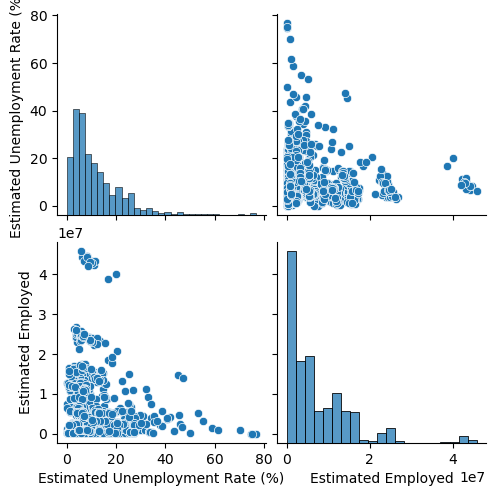

In [47]:
# pair plot
sns.pairplot(data=unemp_df, vars=["Estimated Unemployment Rate (%)", "Estimated Employed"])
plt.show()

**Analysis between numerical and categorical variables**

In [48]:
###75th percentile

def p75(x):
  return np.quantile(x,0.75)

In [49]:
unemp_df.groupby("Year")["Estimated Unemployment Rate (%)"].aggregate(["mean", "median", p75])

,mean,median,p75
Year,,,
2019,9.399047,7.115,12.56
2020,15.101581,10.790,20.37


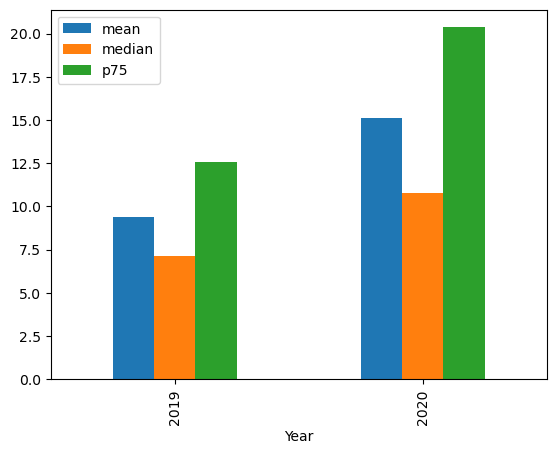

In [50]:
unemp_df.groupby("Year")["Estimated Unemployment Rate (%)"].aggregate(["mean", "median", p75]).plot.bar()
plt.show()

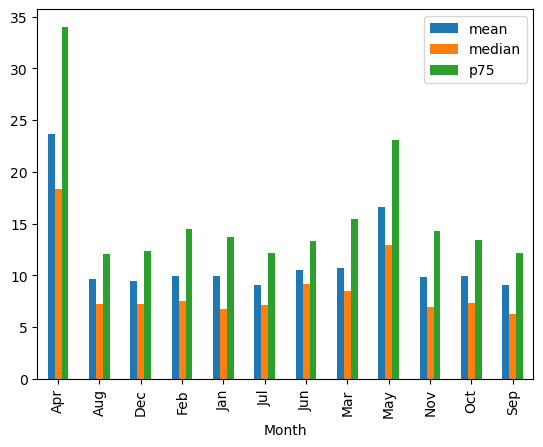

In [51]:
## Month v/s Estimated Unemployment Rate (%)
unemp_df.groupby("Month")["Estimated Unemployment Rate (%)"].aggregate(["mean", "median", p75]).plot.bar()
plt.show()

In [52]:
## Region v/s Estimated Unemployment Rate (%)
unemp_df.groupby("Region")["Estimated Unemployment Rate (%)"].aggregate(["mean", "median", p75])

,mean,median,p75
Region,,,
Andhra Pradesh,7.477143,5.405,7.2175
Assam,6.428077,5.435,9.3500
Bihar,18.918214,15.010,20.0400
Chandigarh,15.991667,17.510,20.4625
Chhattisgarh,9.240357,8.265,9.8375
Delhi,16.495357,15.020,17.4125
Goa,9.274167,6.330,12.5650
Gujarat,6.663929,5.420,6.3925
Haryana,26.283214,25.060,29.4475


<Figure size 1200x1000 with 0 Axes>

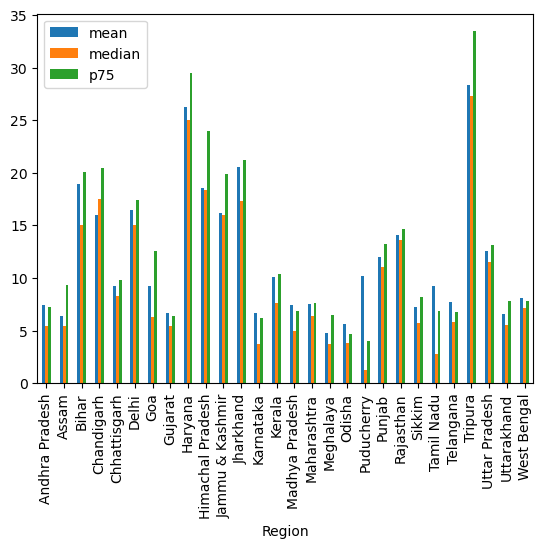

In [53]:
plt.figure(figsize=(12,10))
unemp_df.groupby("Region")["Estimated Unemployment Rate (%)"].aggregate(["mean", "median", p75]).plot.bar()
plt.show()

In [54]:
unemp_df.groupby("Area")["Estimated Unemployment Rate (%)"].aggregate(["mean", "median", p75])

,mean,median,p75
Area,,,
Rural,10.324791,6.76,13.755
Urban,13.166614,9.97,18.040


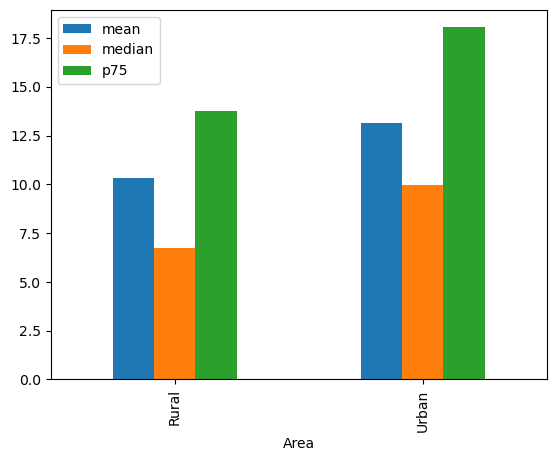

In [55]:
unemp_df.groupby("Area")["Estimated Unemployment Rate (%)"].aggregate(["mean", "median", p75]).plot.bar()
plt.show()

***Analysis between two categorical variables***

In [56]:
# let's convert Area into convenient percentage or number where it is yes we will put 1 and for no we will put 0
unemp_df["Area_flag"] = np.where(unemp_df.Area=="Rural",0,1)

In [57]:
unemp_df["Area_flag"].value_counts(normalize=True)

Area_flag
1    0.514865
0    0.485135
Name: proportion, dtype: float64

In [58]:
## Region v/s Area_flag
unemp_df.groupby("Region")["Area_flag"].aggregate(["mean", "median"])

,mean,median
Region,,
Andhra Pradesh,0.500000,0.5
Assam,0.538462,1.0
Bihar,0.500000,0.5
Chandigarh,1.000000,1.0
Chhattisgarh,0.500000,0.5
Delhi,0.500000,0.5
Goa,0.500000,0.5
Gujarat,0.500000,0.5
Haryana,0.500000,0.5


In [94]:
## Region v/s Area_flag
unemp_df.groupby("Region")["Year_flag"].mean()

Region
Andhra Pradesh      0.428571
Assam               0.423077
Bihar               0.428571
Chandigarh          0.333333
Chhattisgarh        0.428571
Delhi               0.428571
Goa                 0.333333
Gujarat             0.428571
Haryana             0.428571
Himachal Pradesh    0.428571
Jammu & Kashmir     0.428571
Jharkhand           0.428571
Karnataka           0.428571
Kerala              0.428571
Madhya Pradesh      0.428571
Maharashtra         0.428571
Meghalaya           0.407407
Odisha              0.428571
Puducherry          0.384615
Punjab              0.428571
Rajasthan           0.428571
Sikkim              0.352941
Tamil Nadu          0.428571
Telangana           0.428571
Tripura             0.428571
Uttar Pradesh       0.428571
Uttarakhand         0.407407
West Bengal         0.428571
Name: Year_flag, dtype: float64

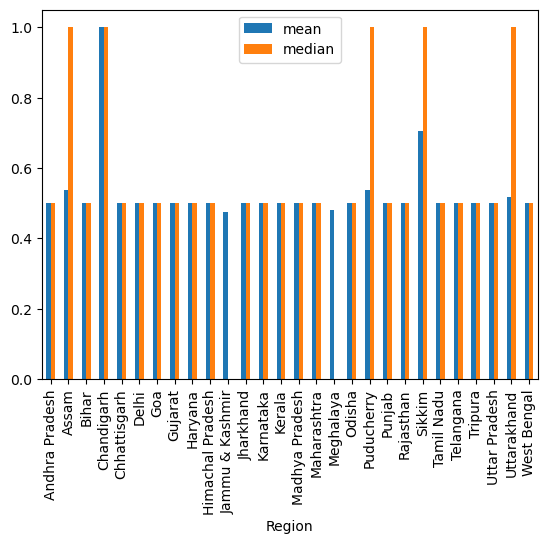

In [59]:
unemp_df.groupby("Region")["Area_flag"].aggregate(["mean", "median"]).plot.bar()
plt.show()

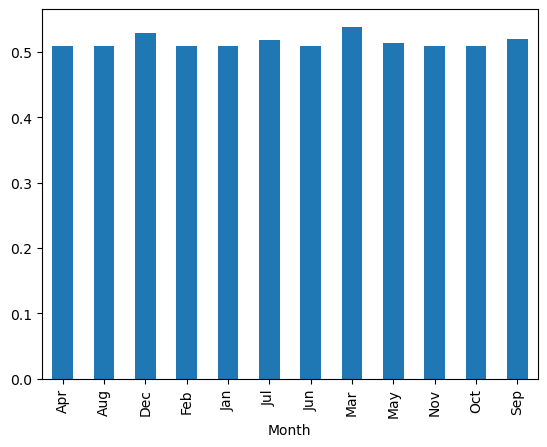

In [60]:
## Month v/s Area_flag
unemp_df.groupby("Month")["Area_flag"].mean().plot.bar()
plt.show()

In [61]:
unemp_df["Estimated Unemployment Rate (%)"].nunique()

624

In [62]:
unemp_df["Estimated Unemployment Rate (%)"].describe()

count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64

In [63]:
bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80]

In [64]:
# Create a new column with binned values
unemp_df['Unemployment Rate Group'] = pd.cut(unemp_df['Estimated Unemployment Rate (%)'], bins=bins)

In [65]:
unemp_df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month,Area_flag,Unemployment Rate Group
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,May,0,"(0, 5]"
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,Jun,0,"(0, 5]"
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,Jul,0,"(0, 5]"
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,Aug,0,"(0, 5]"
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,Sep,0,"(5, 10]"


In [66]:
unemp_df['Unemployment Rate Group'].value_counts()

Unemployment Rate Group
(5, 10]     209
(0, 5]      201
(10, 15]    120
(20, 30]     87
(15, 20]     70
(30, 40]     23
(40, 50]     11
(70, 80]      4
(50, 60]      3
(60, 70]      1
Name: count, dtype: int64

In [67]:
unemp_df.groupby("Unemployment Rate Group")["Area_flag"].mean()

Unemployment Rate Group
(0, 5]      0.368159
(5, 10]     0.559809
(10, 15]    0.575000
(15, 20]    0.542857
(20, 30]    0.655172
(30, 40]    0.608696
(40, 50]    0.454545
(50, 60]    0.333333
(60, 70]    1.000000
(70, 80]    0.750000
Name: Area_flag, dtype: float64

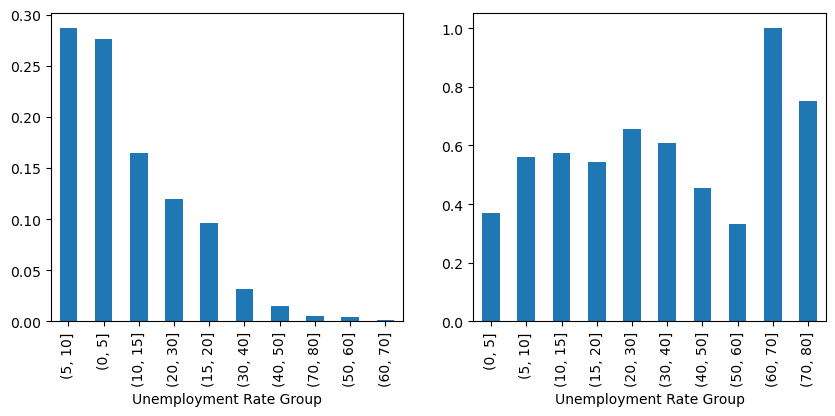

In [68]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
unemp_df["Unemployment Rate Group"].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
unemp_df.groupby("Unemployment Rate Group")["Area_flag"].mean().plot.bar()
plt.show()

In [69]:
unemp_df.dtypes

Region                                             object
Date                                       datetime64[ns]
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
Year                                               object
Month                                              object
Area_flag                                           int64
Unemployment Rate Group                          category
dtype: object

In [70]:
# converted Year into number where it is 2020 we will put 1 and for 2019 we will put 0.

unemp_df["Year_flag"] = np.where(unemp_df.Year=="2019",0,1)

In [71]:
unemp_df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month,Area_flag,Unemployment Rate Group,Year_flag
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,May,0,"(0, 5]",0
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,Jun,0,"(0, 5]",0
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,Jul,0,"(0, 5]",0
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,Aug,0,"(0, 5]",0
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,Sep,0,"(5, 10]",0


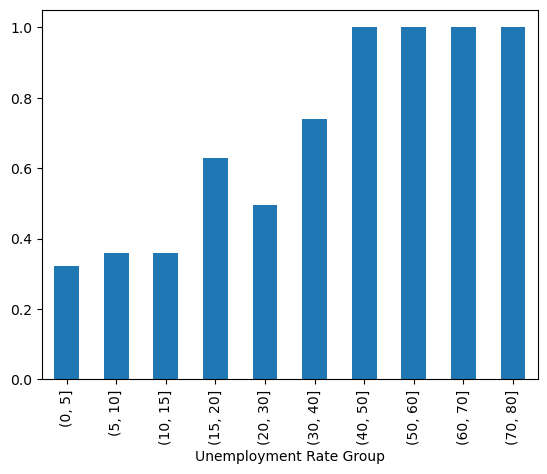

In [72]:
unemp_df.groupby("Unemployment Rate Group")["Year_flag"].mean().plot.bar()
plt.show()

In [73]:
## Checking for correlation between numerical columns and the Year variable
corr_matrix = unemp_df[num_cols + ['Year_flag']].corr()

In [74]:
corr_matrix

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year_flag
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558,0.262602
Estimated Employed,-0.222876,1.000000,0.011300,-0.031841
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000,-0.182460
Year_flag,0.262602,-0.031841,-0.182460,1.000000


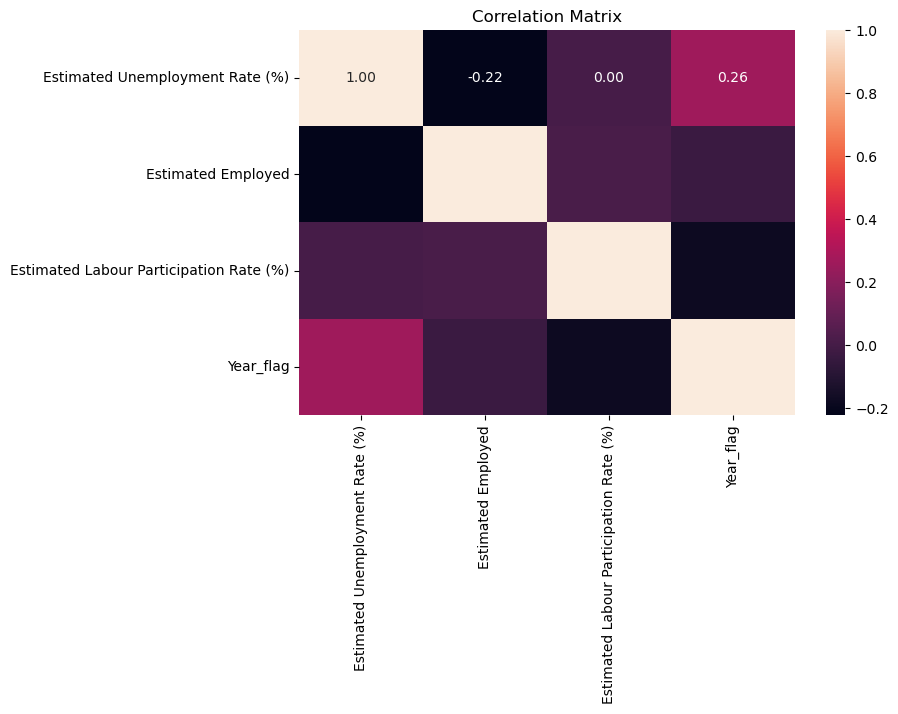

In [75]:
## Visualizing correlation matrix using heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Checking the distribution of each numerical variable by target variable**

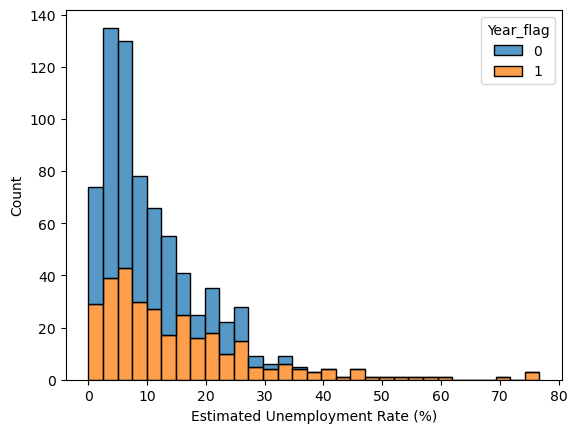

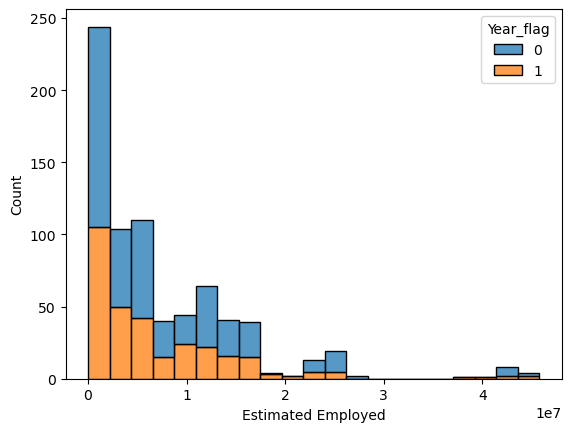

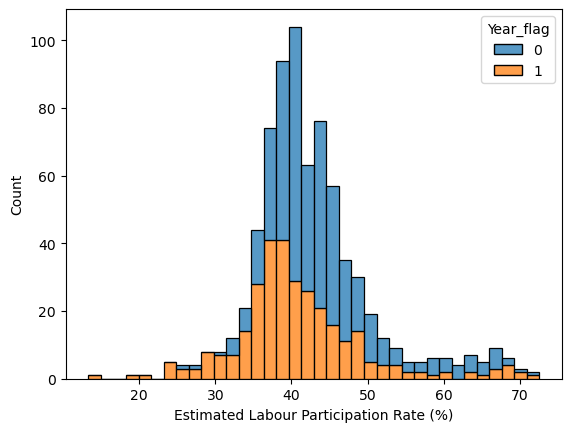

In [76]:
for col in num_cols:
    sns.histplot(x=col, hue='Year_flag', data=unemp_df, multiple='stack')
    plt.show()

**Checking the distribution of each categorical variable by target variable**

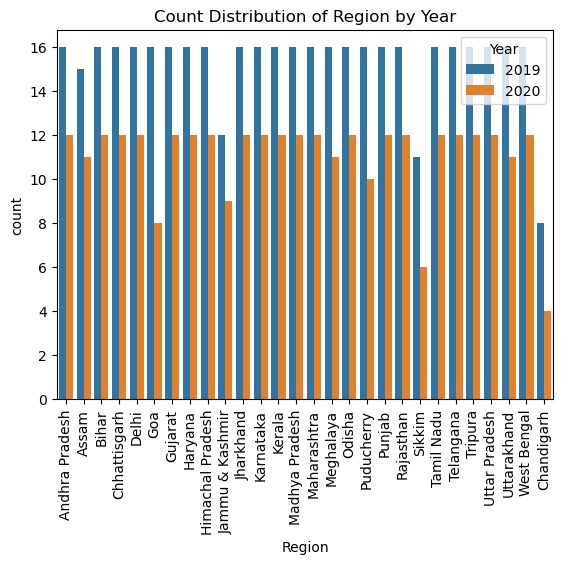

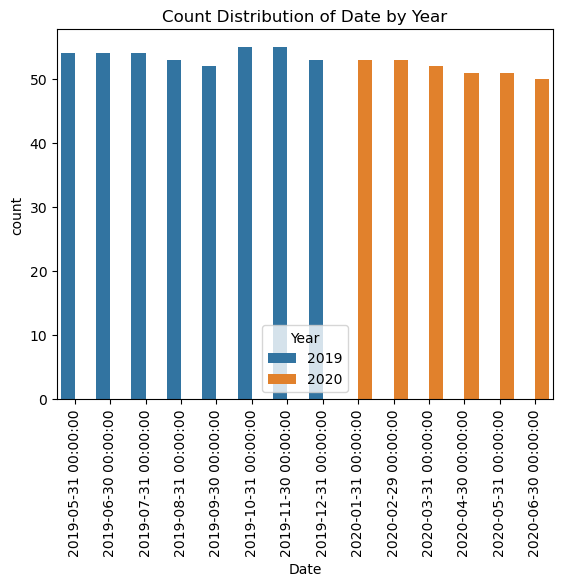

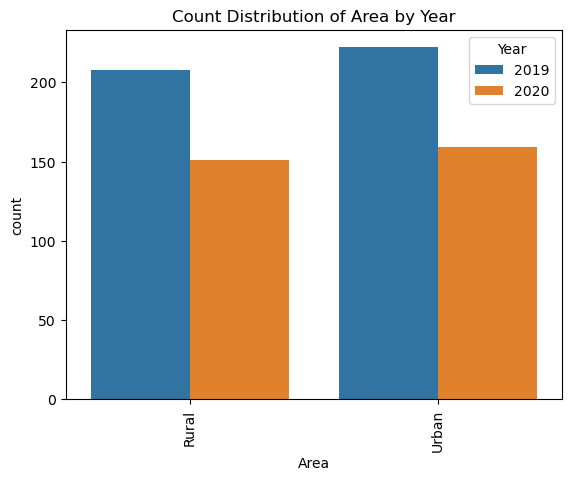

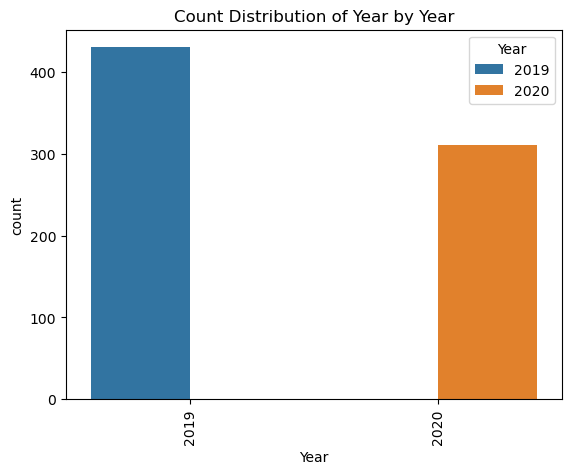

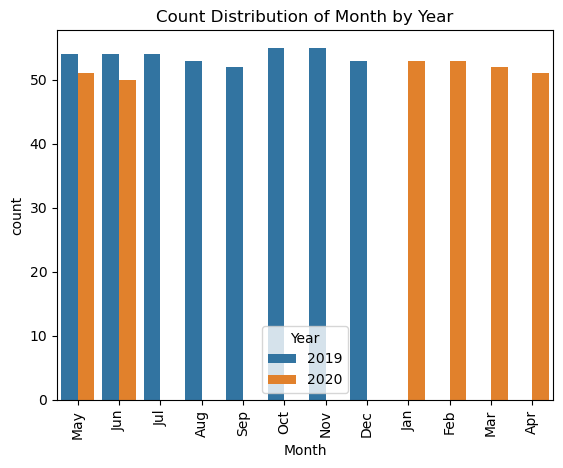

In [77]:
for col in cat_cols:
  sns.countplot(x=col, hue='Year', data=unemp_df)  # Countplot for categorical distribution
  plt.xticks(rotation=90)  # Rotate x-axis labels for better readability with many categories
  plt.title(f"Count Distribution of {col} by Year")
  plt.show()

## Impact of COVID-19 on Employment

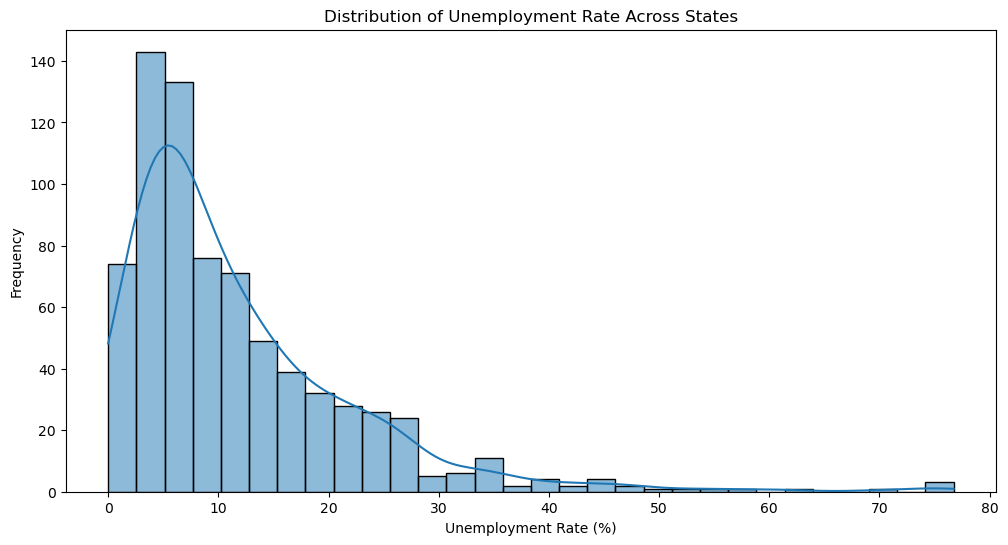

In [78]:
# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Plot a histogram of the 'Estimated Unemployment Rate (%)' column from the unemp_df DataFrame with 30 bins and a kernel density estimate
sns.histplot(unemp_df['Estimated Unemployment Rate (%)'], bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Unemployment Rate Across States')

# Set the label for the x-axis
plt.xlabel('Unemployment Rate (%)')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

***Analyzing unemployment rate over months for different regions***

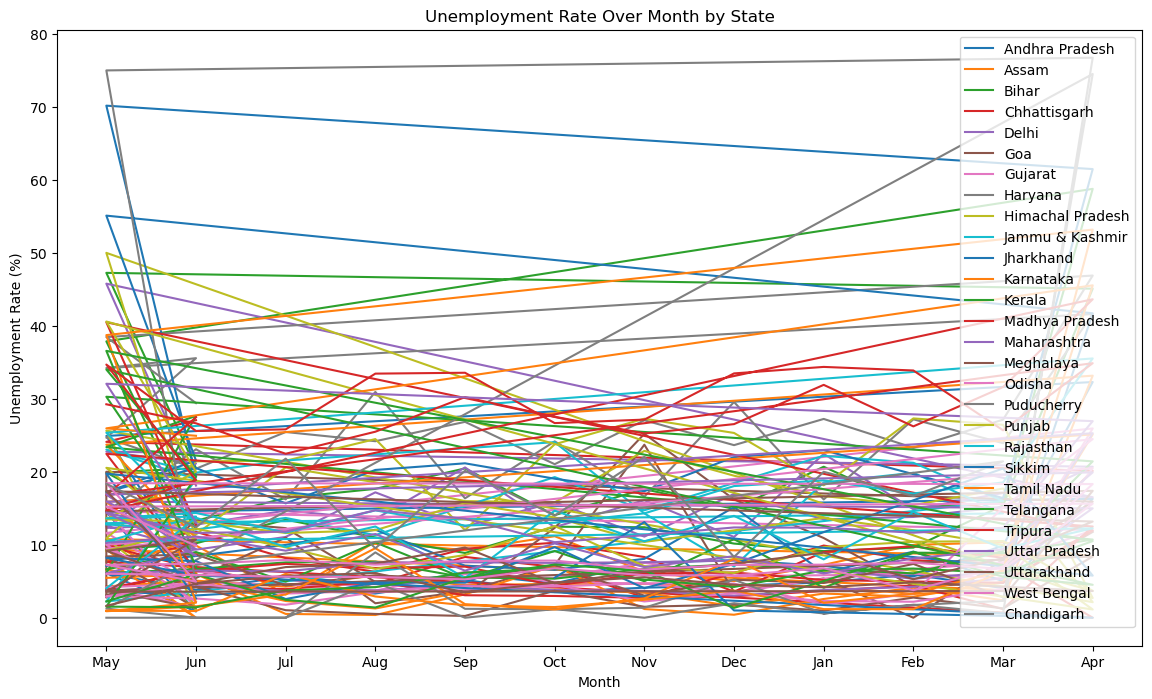

In [79]:
# Create a figure with a specific size
plt.figure(figsize=(14, 8))

# Iterate through each unique region in the 'Region' column of the DataFrame
for region in unemp_df['Region'].unique():
    # Filter the data for the current region
    region_data = unemp_df[unemp_df['Region'] == region]
    # Plot the unemployment rate over time for the current region
    plt.plot(region_data['Month'], region_data['Estimated Unemployment Rate (%)'], label=region)

# Set the title, x-axis label, y-axis label, and display the legend
plt.title('Unemployment Rate Over Month by State')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

***Comparing the employment rates before and after COVID-19 began***

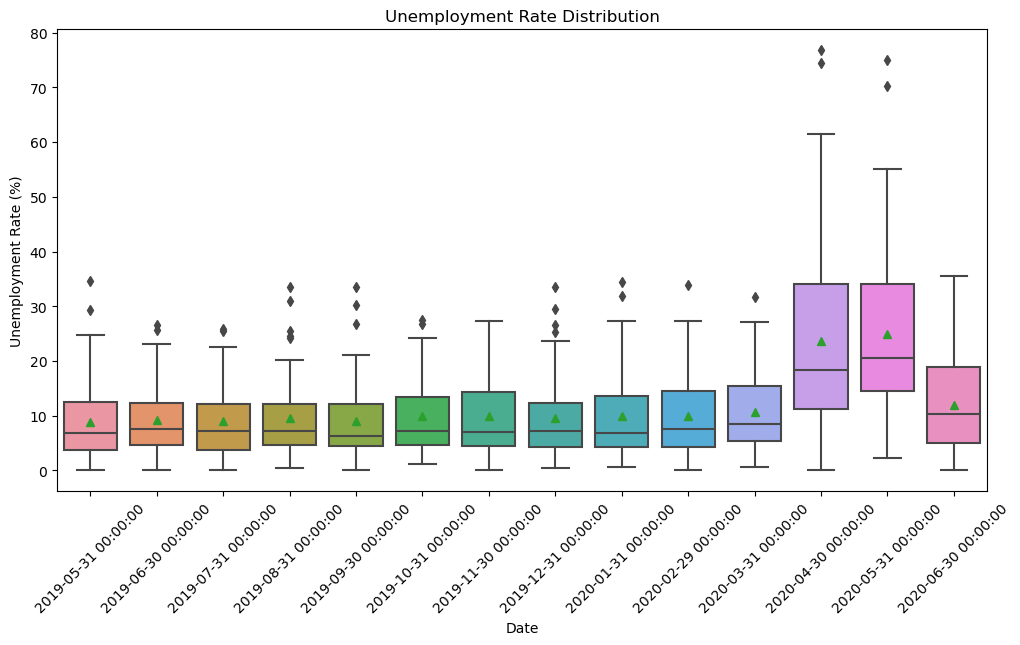

In [82]:
covid_start_date = '2020-01-27'

before_covid = unemp_df[unemp_df['Date'] < covid_start_date]
after_covid = unemp_df[unemp_df['Date'] >= covid_start_date]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Date', y='Estimated Unemployment Rate (%)', data=unemp_df, showmeans=True)

plt.title('Unemployment Rate Distribution')
plt.xlabel('Date')Estimated Unemployment Rate (%)
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

**The ratio of data imbalance**

In [88]:
ratio = unemp_df['Year'].value_counts(normalize=True)
print(ratio)

Year
2019    0.581081
2020    0.418919
Name: proportion, dtype: float64


**Summary :** 
After comparing the unemployment rate before and after covid-19 we have noticed a dramatic surge in unemployment rates coinciding with the onset of the COVID-19 pandemic. Prior to May 2020, unemployment rates exhibited relatively stable fluctuations. However, a sharp increase is evident starting from that point, indicating a substantial negative impact of the pandemic on employment. The data suggests that the crisis led to a considerable job loss and economic hardship for many. While there seems to be a slight decline in unemployment rates towards the end of the observed period, the overall trend highlights the severe and prolonged consequences of COVID-19 on the labor market.